# Eyesense

In [16]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.image import resize 
import os
import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Loading the data

In [2]:
# Data identifiers and target
df = pd.read_csv("/home/cazzi/code/caazzi/eyesense/raw_data/full_df.csv")

In [3]:
img_with_class = df["filename"]

In [4]:
# Define images path
path = "/home/cazzi/code/caazzi/eyesense/raw_data/ODIR-5K/ODIR-5K/Training Images"

img_list = os.listdir(path)

In [5]:
img_list_filtered = list(set(img_list) & set(img_with_class))

file_paths = [os.path.join(path, img) for img in img_list_filtered]

In [6]:
#Load the images as dataframes
%time

num_images = 1000

list_tensors = np.array([resize(tf.convert_to_tensor(img_to_array(image.load_img(path), dtype= int)), [256,256]) 
            for path in file_paths[num_images]])

CPU times: user 3 μs, sys: 0 ns, total: 3 μs
Wall time: 7.87 μs


2025-03-14 15:36:25.043220: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [7]:
%time

tensor_df = tf.stack(list_tensors)
X = tensor_df / 255
X

CPU times: user 5 μs, sys: 2 μs, total: 7 μs
Wall time: 12.2 μs


2025-03-14 15:39:24.702630: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 786432000 exceeds 10% of free system memory.
2025-03-14 15:39:25.527242: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 786432000 exceeds 10% of free system memory.


<tf.Tensor: shape=(1000, 256, 256, 3), dtype=float32, numpy=
array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],



### Checking the image before and after pre processing

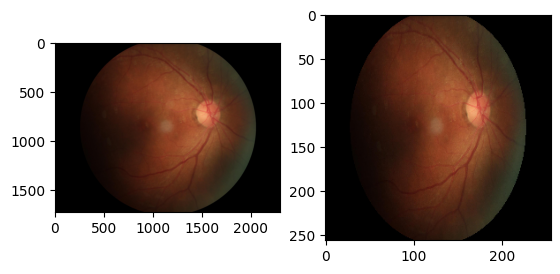

In [8]:
index = 300

fig, (ax1, ax2) = plt.subplots(1, 2)
img = image.load_img(os.path.join(file_paths[index]))

ax1.imshow(img)
ax2.imshow(X[index])

### Define X and y

In [9]:
X.shape

TensorShape([1000, 256, 256, 3])

In [42]:
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(df[["labels"]])
class_names = encoder.categories_[0]
y = pd.DataFrame(y, columns=class_names)

In [48]:
df

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4686_left.jpg
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4688_left.jpg
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4689_left.jpg
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4690_left.jpg


In [43]:
y.shape

(6392, 8)

In [47]:
y

,['A'],['C'],['D'],['G'],['H'],['M'],['N'],['O']
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
6387,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6388,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6389,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6390,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
